First 5 rows:
   review_id  user_id      app_name    app_category  \
0          1  1967825     MX Player  Travel & Local   
1          2  9242600        Tinder      Navigation   
2          3  7636477       Netflix          Dating   
3          4   209031         Venmo    Productivity   
4          5  7190293  Google Drive       Education   

                                         review_text review_language  rating  \
0  Qui doloribus consequuntur. Perspiciatis tempo...              no     1.3   
1  Great app but too many ads, consider premium v...              ru     1.6   
2  The interface could be better but overall good...              es     3.6   
3  Latest update broke some features, please fix ...              vi     3.8   
4  Perfect for daily use, highly recommend to eve...              tl     3.2   

           review_date  verified_purchase     device_type  num_helpful_votes  \
0  2024-10-09 19:26:40               True  Android Tablet                 65   
1  2024-06-21 

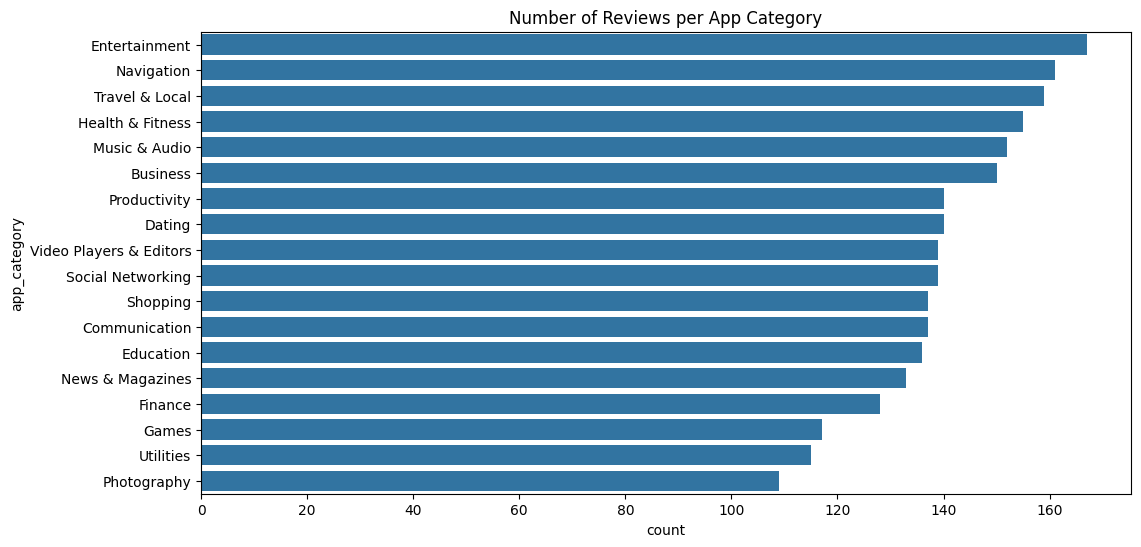

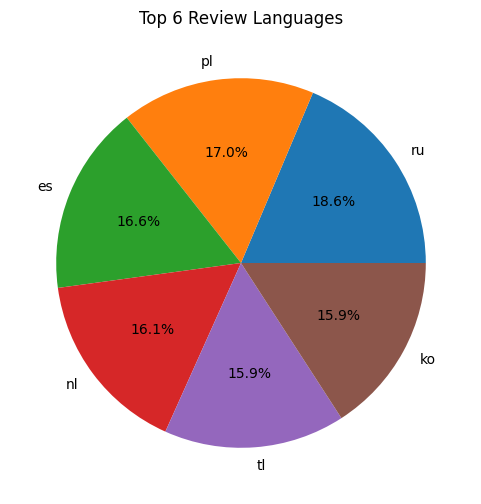

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
df = pd.read_csv("/content/multilingual_mobile_app_reviews_2025.csv")
print("First 5 rows:")
print(df.head())

# Step 3: Data Inspection
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Convert review_date to datetime
df['review_date'] = pd.to_datetime(df['review_date'])

# Step 4: Identify Categorical and Continuous Variables
categorical_vars = ['app_name','app_category','review_language','verified_purchase',
                    'device_type','user_country','user_gender','app_version']
continuous_vars = ['rating','num_helpful_votes','user_age']

print("\nCategorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

# ----------------------------
# Step 5: Univariate Analysis – Categorical
# ----------------------------

# 1. Bar Chart – App Category Frequency
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='app_category', order=df['app_category'].value_counts().index)
plt.title("Number of Reviews per App Category")
plt.show()

# 2. Pie Chart – Review Language Share
df['review_language'].value_counts().head(6).plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 6 Review Languages")
plt.ylabel("")
plt.show()

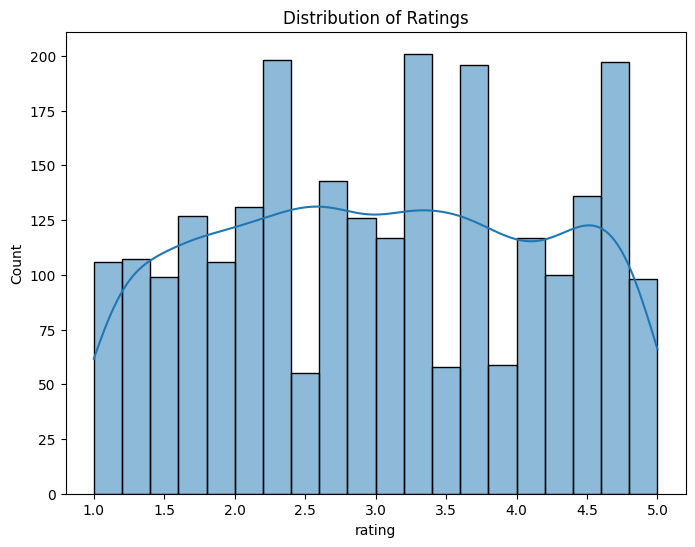

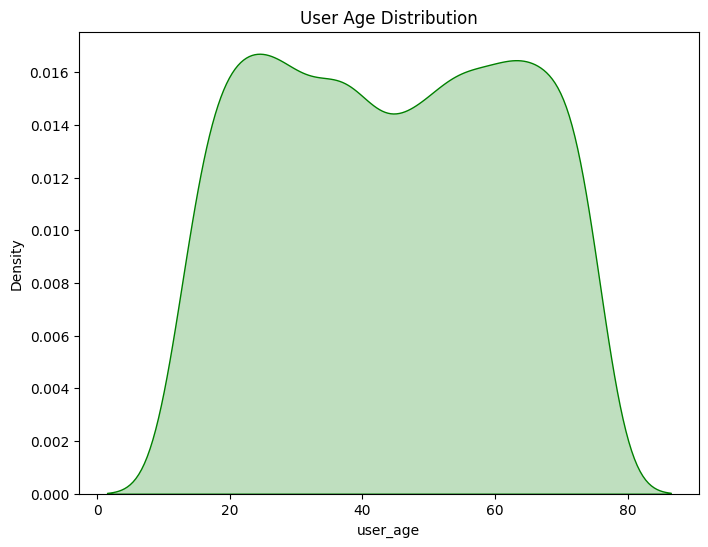

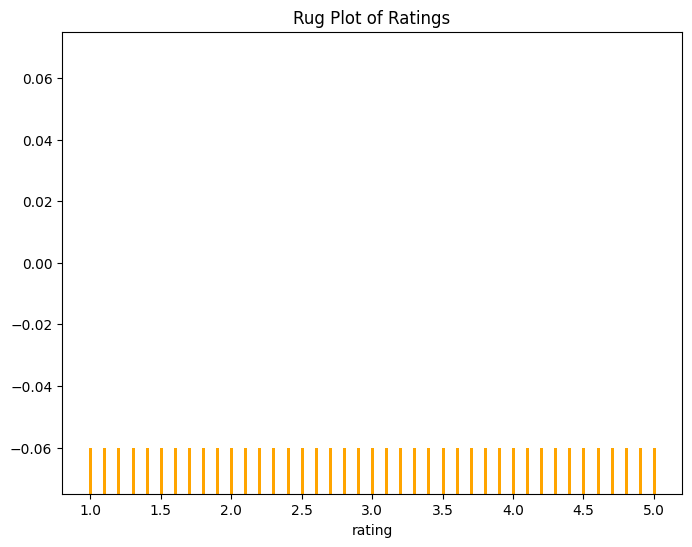

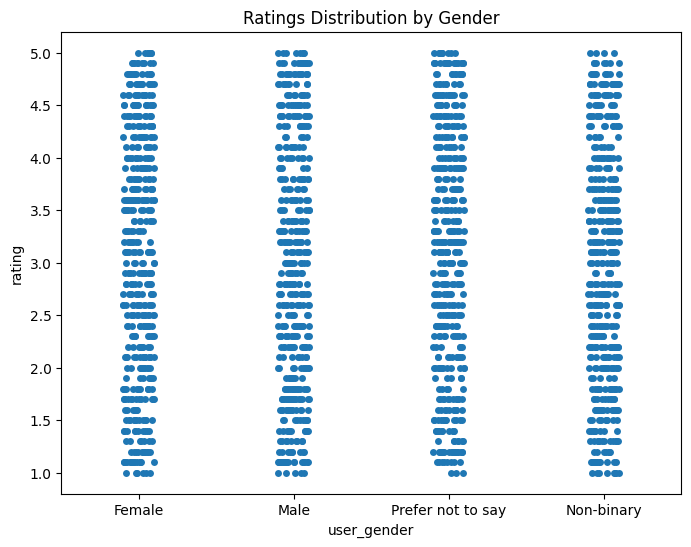

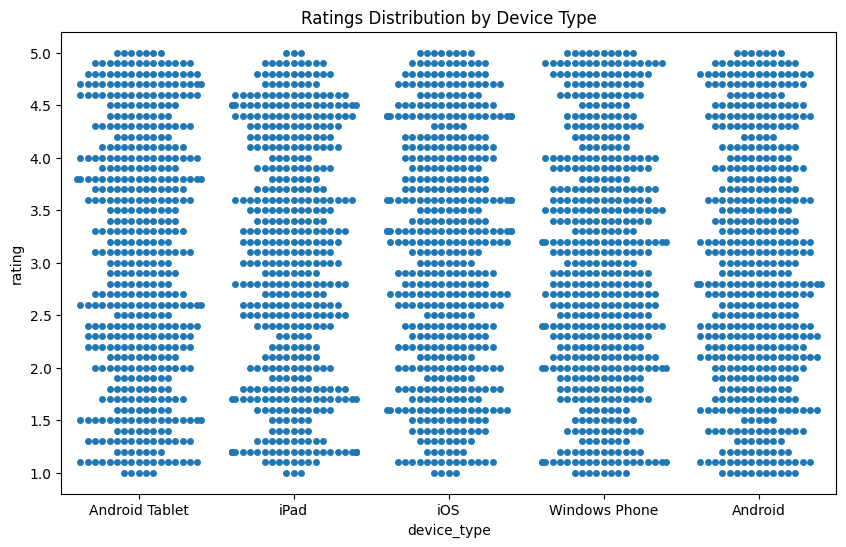

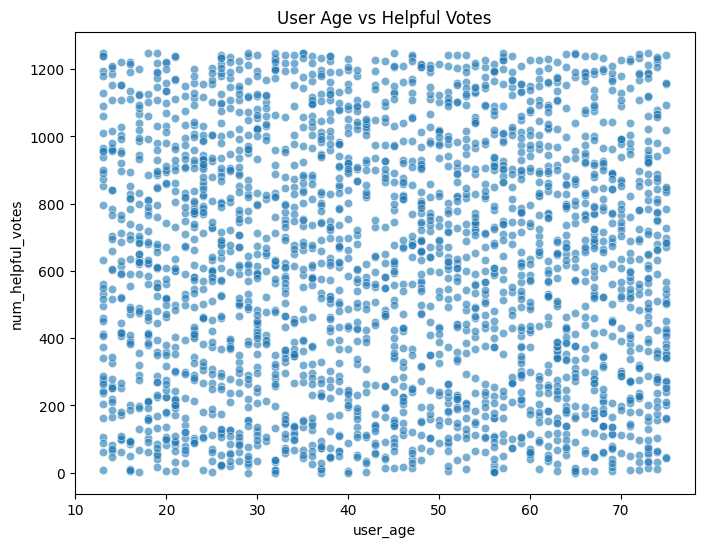

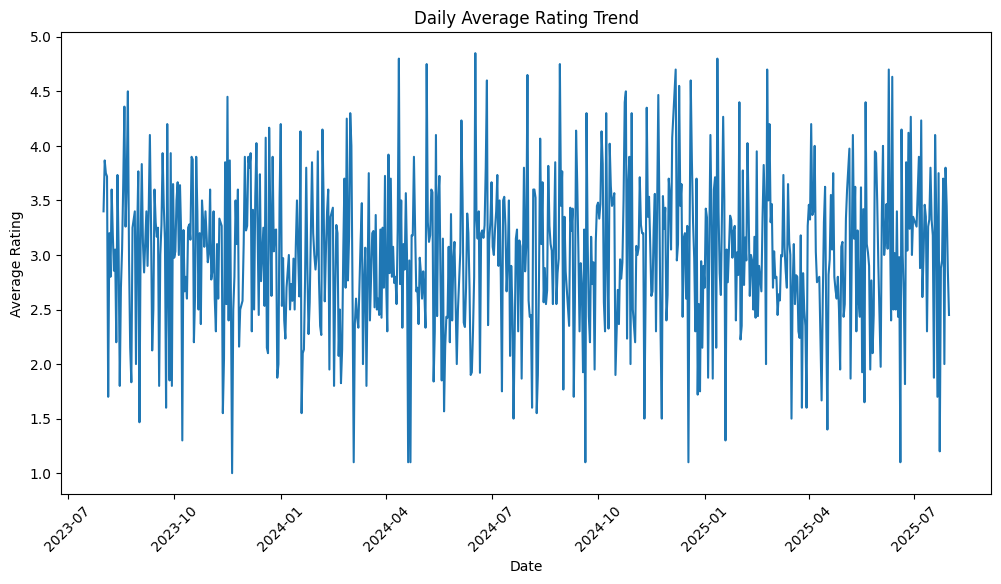

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.show()

# 2. KDE Plot – User Age
plt.figure(figsize=(8,6))
sns.kdeplot(df['user_age'], fill=True, color='green')
plt.title("User Age Distribution")
plt.show()

# 3. Rug Plot – Ratings
plt.figure(figsize=(8,6))
sns.rugplot(df['rating'], height=0.1, color="orange")
plt.title("Rug Plot of Ratings")
plt.show()

# 4. Strip Plot – Ratings vs Gender
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x='user_gender', y='rating', jitter=True)
plt.title("Ratings Distribution by Gender")
plt.show()

# 5. Swarm Plot – Ratings vs Device Type
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='device_type', y='rating')
plt.title("Ratings Distribution by Device Type")
plt.show()

# 6. Scatter Plot – Age vs Helpful Votes
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='user_age', y='num_helpful_votes', alpha=0.6)
plt.title("User Age vs Helpful Votes")
plt.show()

# 7. Line Plot – Average Rating over Time
daily_rating = df.groupby(df['review_date'].dt.date)['rating'].mean()
plt.figure(figsize=(12,6))
daily_rating.plot()
plt.title("Daily Average Rating Trend")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.describe()

,review_id,user_id,rating,review_date,num_helpful_votes,user_age
count,2514.000000,2.514000e+03,2477.000000,2514,2514.000000,2514.000000
mean,1257.500000,5.080737e+06,3.021034,2024-08-01 12:06:42.813047040,616.704057,44.247812
min,1.000000,1.005990e+05,1.000000,2023-08-01 03:40:13,0.000000,13.000000
25%,629.250000,2.595184e+06,2.100000,2024-01-28 05:34:04.750000128,287.250000,28.000000
50%,1257.500000,5.059846e+06,3.000000,2024-07-30 23:20:19,620.000000,44.000000
75%,1885.750000,7.571874e+06,4.000000,2025-02-04 12:15:05.750000128,920.750000,60.000000
max,2514.000000,9.995027e+06,5.000000,2025-07-31 03:37:15,1249.000000,75.000000
std,725.873612,2.846939e+06,1.149955,NaN,363.745326,18.372290
